In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('LeagueofLegends.csv')

In [2]:
data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [3]:
print('Blue wins:', data.bResult.sum())
print('Red wins:', data.rResult.sum())

Blue wins: 4146
Red wins: 3474


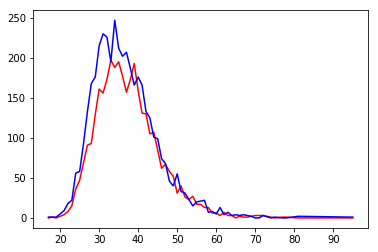

In [4]:
redWinsLength = data.groupby('gamelength').rResult.sum()
blueWinsLength = data.groupby('gamelength').bResult.sum()

plt.plot(redWinsLength.index, redWinsLength, 'r-')
plt.plot(blueWinsLength.index, blueWinsLength, 'b-')

C:\Users\asd84\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


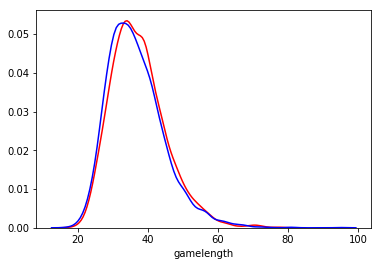

In [5]:
redWins = data[data.rResult == 1]
blueWins = data[data.bResult == 1]

sns.distplot(redWins.gamelength, color='red', hist=False)
sns.distplot(blueWins.gamelength, color='blue', hist=False)

In [6]:
goldData = pd.read_csv('gold.csv')
# Create minute column names for pd.melt()
minutes = ['min_' + str(x + 1) for x in range(81)]
goldData = pd.melt(goldData, id_vars=['Address', 'Type'], value_vars=minutes, 
                   var_name='minute', value_name='gold')
# Changet the minute variable into a integer.
goldData.minute = goldData.minute.str.strip('min_').astype(int)
goldData.head()

,Address,Type,minute,gold
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,40.0


Text(0, 0.5, 'Gold')

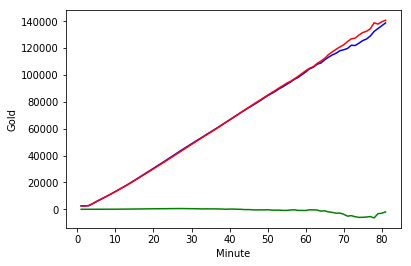

In [8]:
blueGold = goldData[goldData.Type == 'goldblue'].groupby('minute').gold.mean()
redGold = goldData[goldData.Type == 'goldred'].groupby('minute').gold.mean()
goldDiff = goldData[goldData.Type == 'golddiff'].groupby('minute').gold.mean()

plt.plot(blueGold, 'b-')
plt.plot(redGold, 'r-')
plt.plot(goldDiff, 'g-')
plt.xlabel('Minute')
plt.ylabel('Gold')

In [9]:
goldData.Type.unique()

array(['golddiff', 'goldblue', 'goldred', 'goldblueTop', 'goldblueJungle',
       'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop',
       'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport'],
      dtype=object)

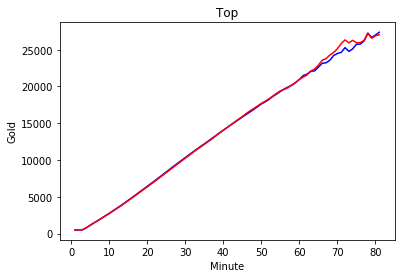

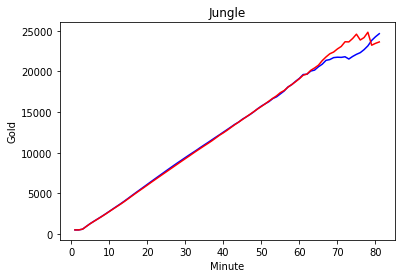

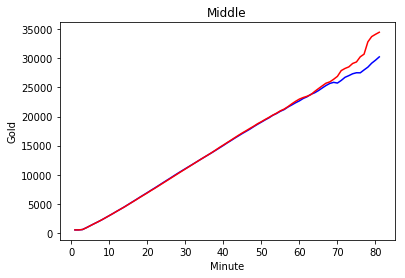

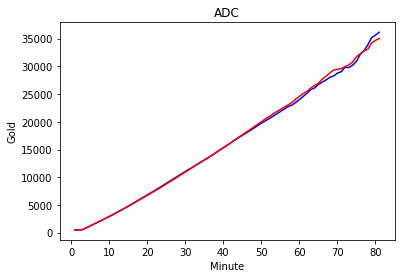

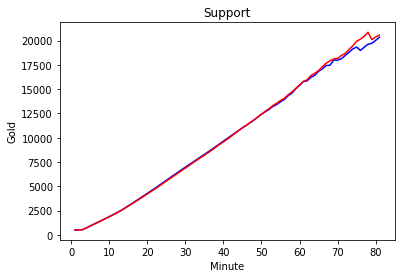

In [11]:
sections = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
num_sections = len(sections)

for i in range(num_sections):
    plt.figure(i)
    plt.plot(goldData[goldData.Type == 'goldblue' + sections[i]].groupby('minute').gold.mean(), 'b-')
    plt.plot(goldData[goldData.Type == 'goldred' + sections[i]].groupby('minute').gold.mean(), 'r-')
    plt.xlabel('Minute')
    plt.ylabel('Gold')
    plt.title(sections[i])

Text(0.5, 1.0, 'Difference in gold from the Jungle')

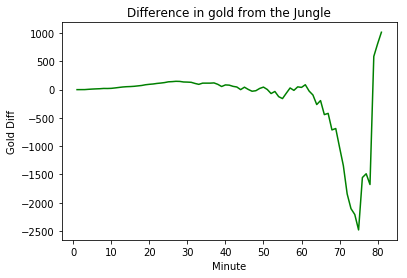

In [12]:
goldJungleDiff = goldData[goldData.Type == 'goldblueJungle'].groupby('minute').mean() - \
                 goldData[goldData.Type == 'goldredJungle'].groupby('minute').mean()
    
plt.plot(goldJungleDiff, 'g-')
plt.ylabel('Gold Diff')
plt.xlabel('Minute')
plt.title('Difference in gold from the Jungle')

In [13]:
killData = pd.read_csv('kills.csv')
killData.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


C:\Users\asd84\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


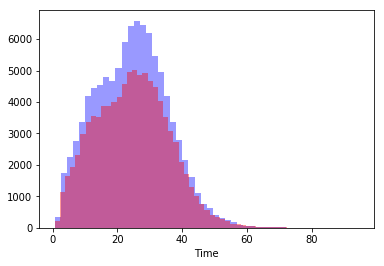

In [15]:
blueDeaths = killData[killData.Team == 'bKills']
redDeaths = killData[killData.Team == 'rKills']
blueDeaths = blueDeaths[blueDeaths.Time.notnull()]
redDeaths = redDeaths[redDeaths.Time.notnull()]

sns.distplot(blueDeaths.Time, kde=False, color='blue')
sns.distplot(redDeaths.Time, kde=False, color='red')

In [16]:
objData = pd.read_csv('objValues.csv')
objData.head()

,MatchHistory,ObjType,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,15.217,15.014,33.583,39.269,39.376,16.556,17.856,27.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.018,34.766,23.239,20.058,15.306,25.564,28.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,18.294,36.946,32.833,25.481,29.505,38.445,39.420,25.120,30.158,39.566,37.109,17.34,35.463,15.045,33.135,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,22.879,18.541,19.941,38.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.925,26.963,22.594,34.515,34.213,14.976,33.717,18.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
nums = ['num_' + str(x) for x in range(1, 17)]
objData = pd.melt(objData, id_vars=['MatchHistory', 'ObjType'], value_vars=nums)

In [19]:
objData = pd.read_csv('objValues.csv')
objData.head()

,MatchHistory,ObjType,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,15.217,15.014,33.583,39.269,39.376,16.556,17.856,27.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.018,34.766,23.239,20.058,15.306,25.564,28.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,18.294,36.946,32.833,25.481,29.505,38.445,39.420,25.120,30.158,39.566,37.109,17.34,35.463,15.045,33.135,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,22.879,18.541,19.941,38.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.925,26.963,22.594,34.515,34.213,14.976,33.717,18.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
nums = ['num_' + str(x) for x in range(1, 17)]
objDataMelted = pd.melt(objData, id_vars=['ObjType'], value_vars=nums)
objDataMelted = objDataMelted[objDataMelted.value.notnull()]

C:\Users\asd84\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


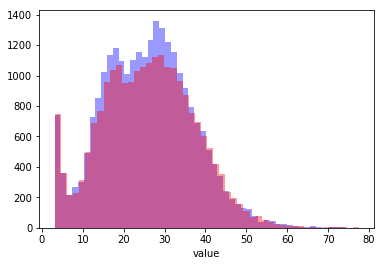

In [21]:
sns.distplot(objDataMelted[objDataMelted.ObjType == 'bTowers'].value, kde=False, color='blue')
sns.distplot(objDataMelted[objDataMelted.ObjType == 'rTowers'].value, kde=False, color='red')